### Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_excel("./data.xlsx")
print("Displaying samples from data")

Displaying samples from data


In [4]:
data.head(10)

,State,Year,Account of Crime,Trial of Violent Crimes by Courts By Confession,Trial of Violent Crimes by Courts By trial,Trial of Violent Crimes by Courts Total
0,Montana,Montana,Montana,Montana,Montana,Montana
1,Montana,Montana,Montana,Montana,Montana,Montana
2,Montana,Montana,Montana,Montana,Montana,Montana
3,Montana,Montana,Montana,Montana,Montana,Montana
4,Montana,Montana,Montana,Montana,Montana,Montana
5,Montana,Montana,Montana,Montana,Montana,Montana
6,California,2001,Murder and Homicide,NaN,2,2
7,New York,2001,Murder and Homicide,18,75,93
8,Idaho,2001,Murder and Homicide,NaN,41,41
9,Minnesota,2001,Murder and Homicide,2,228,230


In [5]:
data.drop(index = data.index[:6],inplace = True)
data.head(10)

,State,Year,Account of Crime,Trial of Violent Crimes by Courts By Confession,Trial of Violent Crimes by Courts By trial,Trial of Violent Crimes by Courts Total
6,California,2001,Murder and Homicide,NaN,2,2
7,New York,2001,Murder and Homicide,18,75,93
8,Idaho,2001,Murder and Homicide,NaN,41,41
9,Minnesota,2001,Murder and Homicide,2,228,230
10,Georgia,2001,Murder and Homicide,3,106,109
11,Kansas,2001,Murder and Homicide,0,66,66
12,Indiana,2001,Murder and Homicide,0,48,48
13,South Carolina,2001,Murder and Homicide,0,66,66
14,Michigan,2001,Murder and Homicide,0,181,181
15,Missouri,2001,Murder and Homicide,2,92,94


In [6]:
print("No of Rows -",data.shape[0])
print("No of columns -",data.shape[1])

No of Rows - 4467
No of columns - 6


In [7]:
print("Overview of Data :")
data.describe()

Overview of Data :


,State,Year,Account of Crime,Trial of Violent Crimes by Courts By Confession,Trial of Violent Crimes by Courts By trial,Trial of Violent Crimes by Courts Total
count,4466,4467,4467,3144,4455,4464
unique,35,10,14,159,1283,1299
top,Louisiana,2004,TVC- Total,0,0,0
freq,140,457,346,1949,221,215


In [8]:
cols = data.columns
print("Null Value Information :")
table = PrettyTable(['Column Name','Count of Null Values','Percentage of Null Values'])
for i in range(len(cols)):
    table.add_row([cols[i],data.isnull().sum()[i],(data.isnull().sum()[i]/len(data))*100])
table 

Null Value Information :


Column Name,Count of Null Values,Percentage of Null Values
State,1,0.02238638907544213
Year,0,0.0
Account of Crime,0,0.0
Trial of Violent Crimes by Courts By Confession,1323,29.61719274680994
Trial of Violent Crimes by Courts By trial,12,0.2686366689053056
Trial of Violent Crimes by Courts Total,3,0.0671591672263264


In [9]:
data.replace({"NULL": np.nan}, inplace=True)

In [10]:
data["Trial of Violent Crimes by Courts By Confession"] = data["Trial of Violent Crimes by Courts By Confession"].interpolate(method = "linear",limit_direction = "both")

In [11]:
data["Trial of Violent Crimes by Courts By trial"] = data["Trial of Violent Crimes by Courts By trial"].interpolate(method = "linear",limit_direction = "both")

In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

State                                              0
Year                                               0
Account of Crime                                   0
Trial of Violent Crimes by Courts By Confession    0
Trial of Violent Crimes by Courts By trial         0
Trial of Violent Crimes by Courts Total            0
dtype: int64

In [14]:
duplicates = data.duplicated()
print("No of duplicates -",duplicates.sum())

No of duplicates - 0


In [15]:
print("Types of Crime Occured :")
crime_class = data["Account of Crime"].value_counts()
crime_class

Types of Crime Occured :


TVC- Total                             346
Tax Evasion                            338
Robbery                                336
TVC- Rape                              335
TVC- Riots                             335
Possession of Illegal Weapon           327
Reckless Driving                       322
TVC- Robbery                           322
Murder and Homicide                    314
Conspiracy                             314
Drug Manufacturing and Distribution    307
Auto Theft                             306
Threatening and Intimidation           293
Tampering with evidence                268
Name: Account of Crime, dtype: int64

### Account of Crimes 

In [16]:
print("Crime Classes :",len(data["Account of Crime"].unique()))

Crime Classes : 14


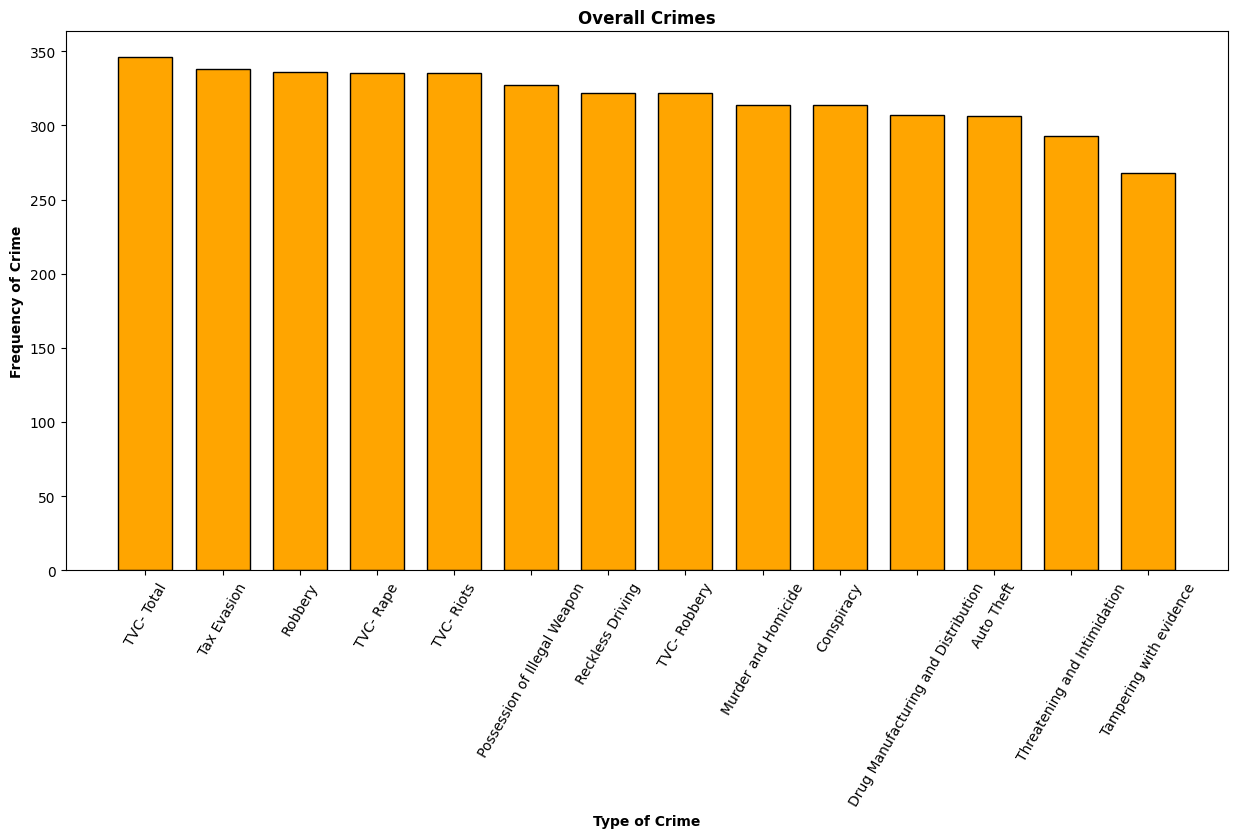

In [17]:
num_bins = len(data["Account of Crime"].unique())
crime_counts = data["Account of Crime"].value_counts()
bar_width = 0.7
fig, ax = plt.subplots(figsize=(15, 7))  
ax.bar(crime_counts.index, crime_counts.values, color='orange', edgecolor='black', width=bar_width)
ax.set_xlabel('Type of Crime',fontweight = "bold")
ax.set_ylabel('Frequency of Crime',fontweight = "bold")
ax.set_title('Overall Crimes',fontweight = "bold")
ax.tick_params(axis='x', rotation=60)  
plt.show()

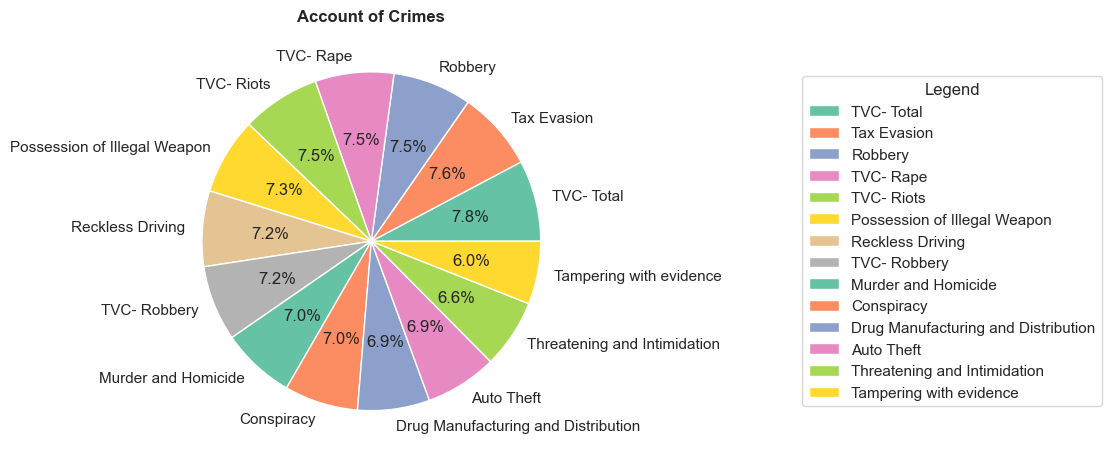

In [18]:
plt.figure(figsize=(5.5,5.5))
class_counts = crime_class
sns.set(style="whitegrid")
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.legend(title='Legend', loc='center left',bbox_to_anchor=(1.5, 0.5), labels=class_counts.index)
plt.title('Account of Crimes', fontweight='bold')
plt.show()

### Rate of crime in States

In [19]:
print("Total No of States :",len(data["State"].unique()))

Total No of States : 35


In [20]:
state_counts = data["State"].value_counts()
state_counts 

Louisiana                    140
Michigan                     140
District of Columbia         140
New Mexico                   140
West Virginia                140
Arkansas                     140
Alaska                       140
Wisconsin                    140
Missouri                     140
South Carolina               140
Kansas                       140
Georgia                      140
Minnesota                    140
New York                     140
Florida                      139
Montana                      139
Texas                        139
Colorado                     139
South Dakota                 139
Indiana                      139
Delaware                     138
North Dakota                 137
Oregon                       136
Maryland                     133
Utah                         132
Oklahoma                     129
Vermont                      126
Idaho                        123
Pennsylvania                 119
Ohio                         119
California

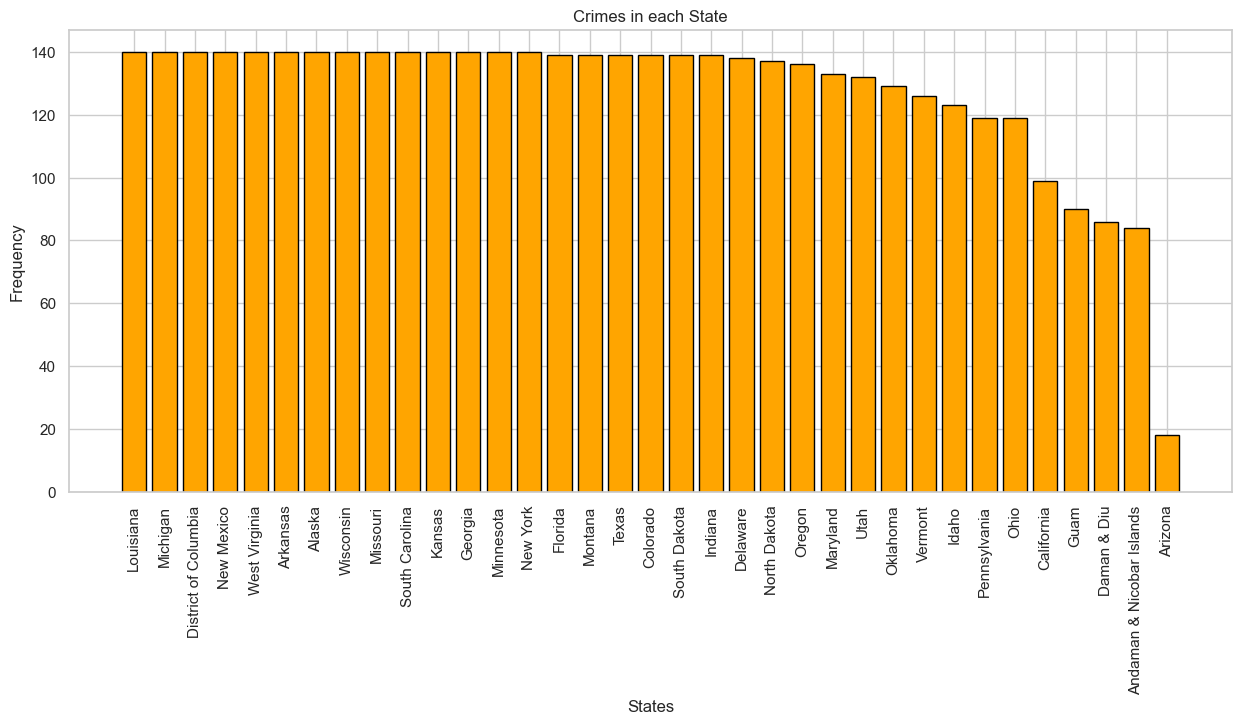

In [21]:
num_bins = len(data["State"].unique())
bar_width = 0.8
fig, ax = plt.subplots(figsize=(15, 6))  
ax.bar(state_counts.index, state_counts.values, color='orange', edgecolor='black', width=bar_width)
ax.set_xlabel('States')
ax.set_ylabel('Frequency')
ax.set_title('Crimes in each State')
ax.tick_params(axis='x', rotation=90)
plt.show()

In [22]:
result1 = data.groupby('Year')['Trial of Violent Crimes by Courts By Confession'].sum().reset_index()

In [23]:
result1

,Year,Trial of Violent Crimes by Courts By Confession
0,2001,9164.0
1,2002,11126.0
2,2003,5110.0
3,2004,4415.5
4,2005,8720.0
5,2006,4837.5
6,2007,6008.0
7,2008,10311.5
8,2009,8226.5
9,2010,6466.5


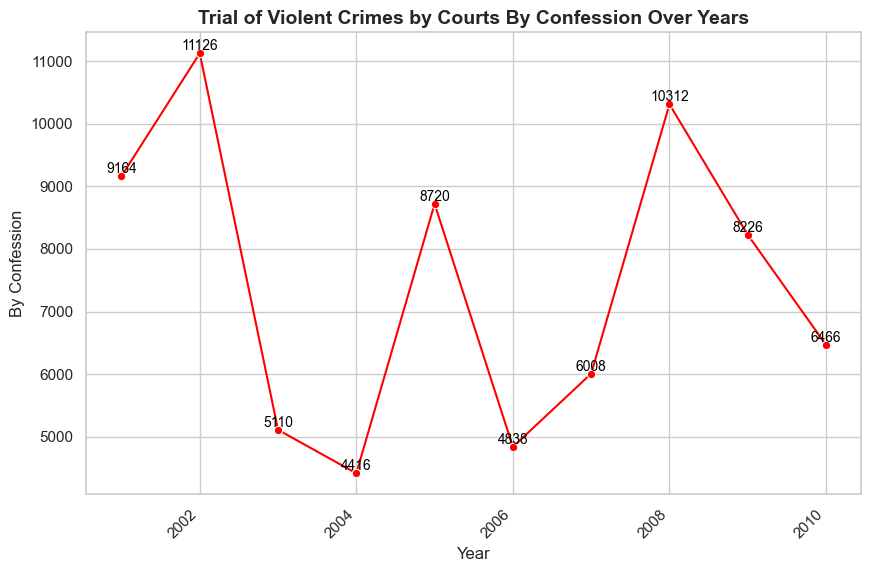

In [24]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Year', y='Trial of Violent Crimes by Courts By Confession', data=result1, marker='o', color="red")
for _, p in result1.iterrows():
    ax.text(p['Year'], p['Trial of Violent Crimes by Courts By Confession'], f'{p["Trial of Violent Crimes by Courts By Confession"]:.0f}',
            ha='center', va='bottom', fontsize=10, color='black')
plt.xlabel('Year', fontsize=12)
plt.ylabel('By Confession', fontsize=12)
plt.title('Trial of Violent Crimes by Courts By Confession Over Years', fontweight="bold", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

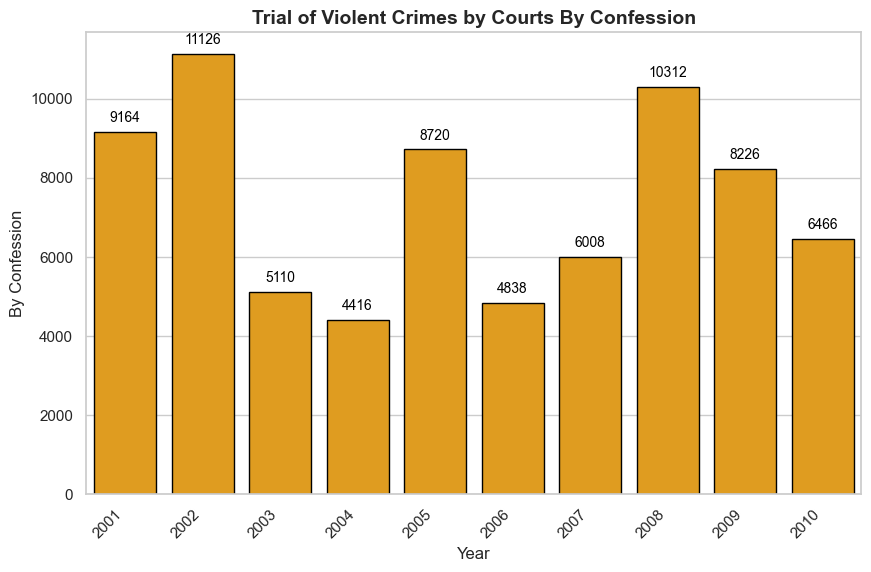

In [25]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Trial of Violent Crimes by Courts By Confession', data=result1,edgecolor='black',color = "orange")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.xlabel('Year', fontsize=12)
plt.ylabel('By Confession', fontsize=12)
plt.title('Trial of Violent Crimes by Courts By Confession', fontweight="bold", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
result2 = data.groupby('Year')['Trial of Violent Crimes by Courts By trial'].sum().reset_index()

In [27]:
result2

,Year,Trial of Violent Crimes by Courts By trial
0,2001,290750.0
1,2002,310908.0
2,2003,302866.0
3,2004,305389.0
4,2005,302079.0
5,2006,308622.0
6,2007,288779.0
7,2008,286157.0
8,2009,254503.5
9,2010,295179.0


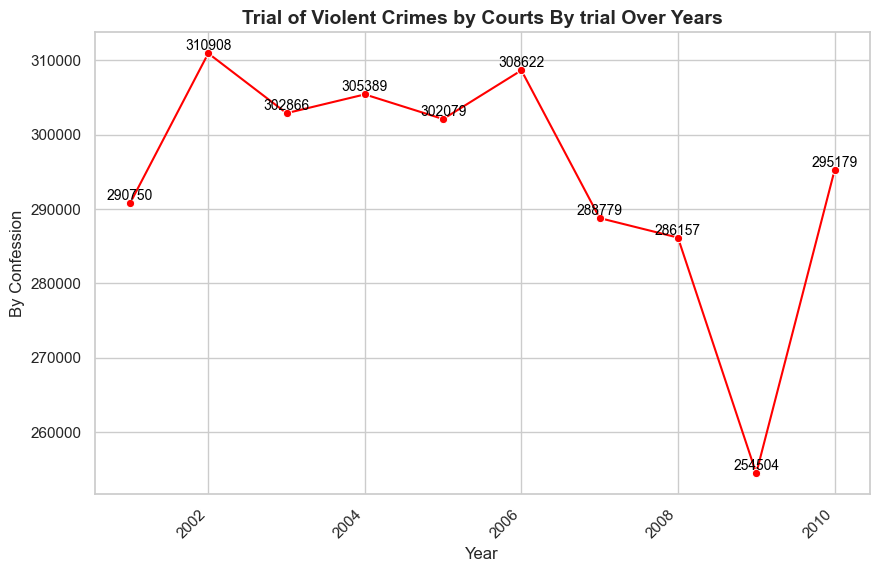

In [28]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Year', y='Trial of Violent Crimes by Courts By trial', data=result2, marker='o', color="red")
for _, p in result2.iterrows():
    ax.text(p['Year'], p['Trial of Violent Crimes by Courts By trial'], f'{p["Trial of Violent Crimes by Courts By trial"]:.0f}',
            ha='center', va='bottom', fontsize=10, color='black')
plt.xlabel('Year', fontsize=12)
plt.ylabel('By Confession', fontsize=12)
plt.title('Trial of Violent Crimes by Courts By trial Over Years', fontweight="bold", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

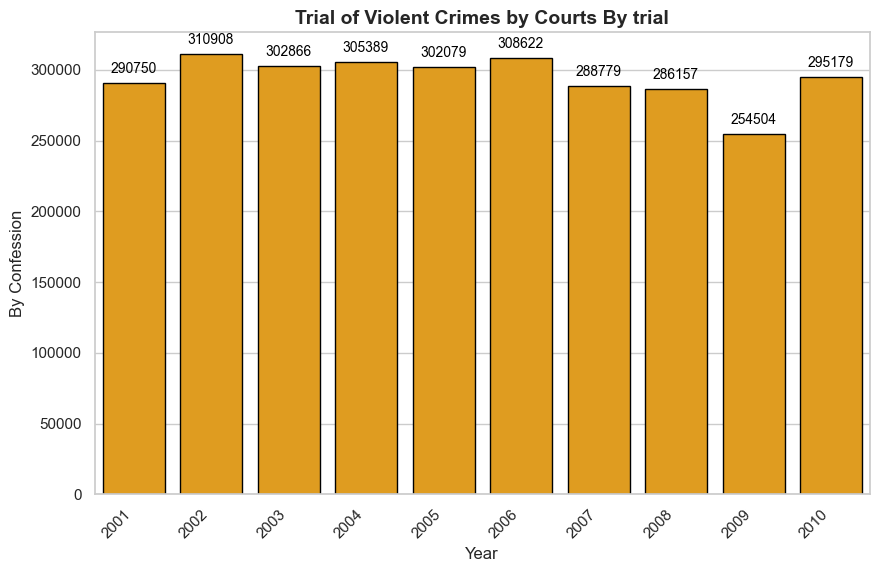

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Trial of Violent Crimes by Courts By trial', data=result2,edgecolor='black',color="orange")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.xlabel('Year', fontsize=12)
plt.ylabel('By Confession', fontsize=12)
plt.title('Trial of Violent Crimes by Courts By trial', fontweight="bold", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [30]:
result3 = data.groupby('Year')['Trial of Violent Crimes by Courts Total'].sum().reset_index()

In [31]:
result3

,Year,Trial of Violent Crimes by Courts Total
0,2001,296444.0
1,2002,318015.0
2,2003,305832.0
3,2004,308312.0
4,2005,306067.0
5,2006,312948.0
6,2007,292086.0
7,2008,290659.0
8,2009,258850.0
9,2010,299485.0


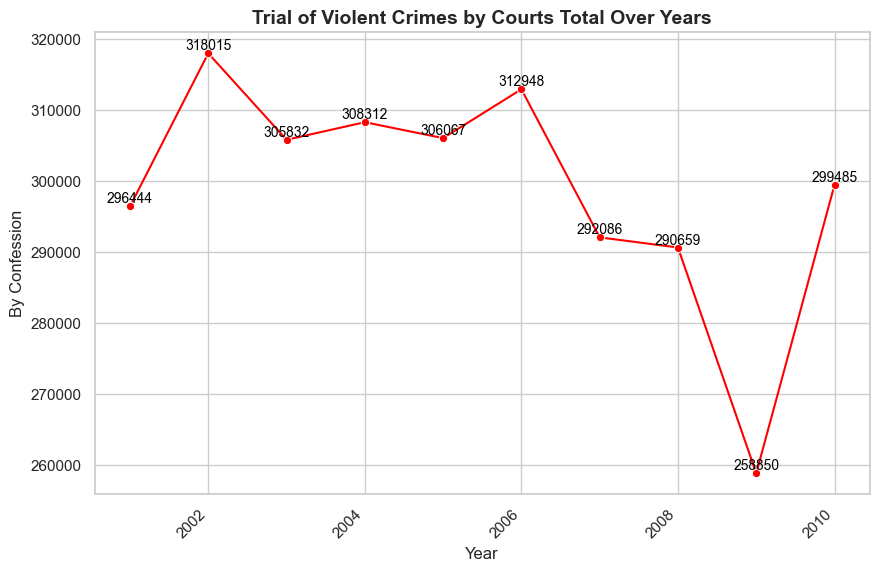

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Year', y='Trial of Violent Crimes by Courts Total', data=result3, marker='o', color="red")
for _, p in result3.iterrows():
    ax.text(p['Year'], p['Trial of Violent Crimes by Courts Total'], f'{p["Trial of Violent Crimes by Courts Total"]:.0f}',
            ha='center', va='bottom', fontsize=10, color='black')
plt.xlabel('Year', fontsize=12)
plt.ylabel('By Confession', fontsize=12)
plt.title('Trial of Violent Crimes by Courts Total Over Years', fontweight="bold", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

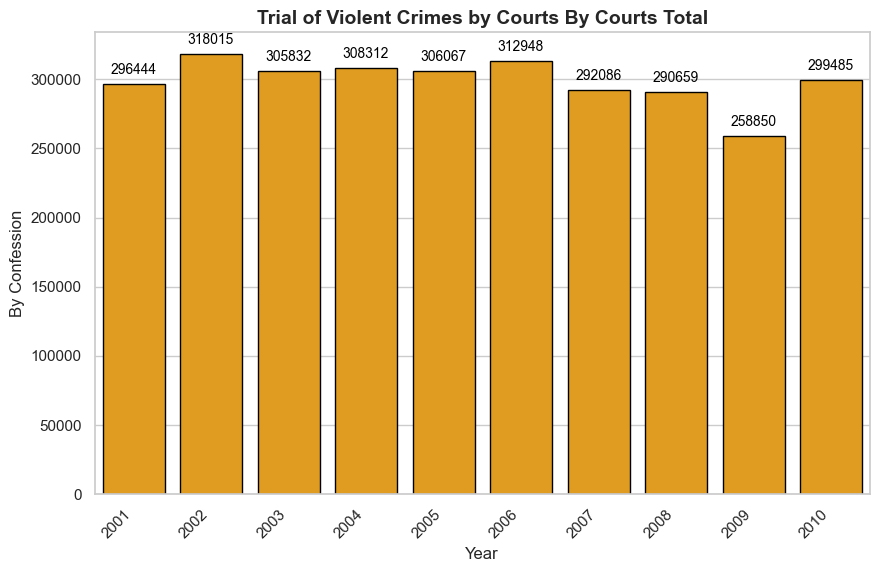

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Trial of Violent Crimes by Courts Total', data=result3,edgecolor='black',color="orange")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.xlabel('Year', fontsize=12)
plt.ylabel('By Confession', fontsize=12)
plt.title('Trial of Violent Crimes by Courts By Courts Total', fontweight="bold", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [34]:
merged_result = pd.merge(result1, result2, on='Year')

In [35]:
merged_result

,Year,Trial of Violent Crimes by Courts By Confession,Trial of Violent Crimes by Courts By trial
0,2001,9164.0,290750.0
1,2002,11126.0,310908.0
2,2003,5110.0,302866.0
3,2004,4415.5,305389.0
4,2005,8720.0,302079.0
5,2006,4837.5,308622.0
6,2007,6008.0,288779.0
7,2008,10311.5,286157.0
8,2009,8226.5,254503.5
9,2010,6466.5,295179.0


In [36]:
merged_result = pd.merge(merged_result, result3, on='Year')

In [37]:
merged_result

,Year,Trial of Violent Crimes by Courts By Confession,Trial of Violent Crimes by Courts By trial,Trial of Violent Crimes by Courts Total
0,2001,9164.0,290750.0,296444.0
1,2002,11126.0,310908.0,318015.0
2,2003,5110.0,302866.0,305832.0
3,2004,4415.5,305389.0,308312.0
4,2005,8720.0,302079.0,306067.0
5,2006,4837.5,308622.0,312948.0
6,2007,6008.0,288779.0,292086.0
7,2008,10311.5,286157.0,290659.0
8,2009,8226.5,254503.5,258850.0
9,2010,6466.5,295179.0,299485.0


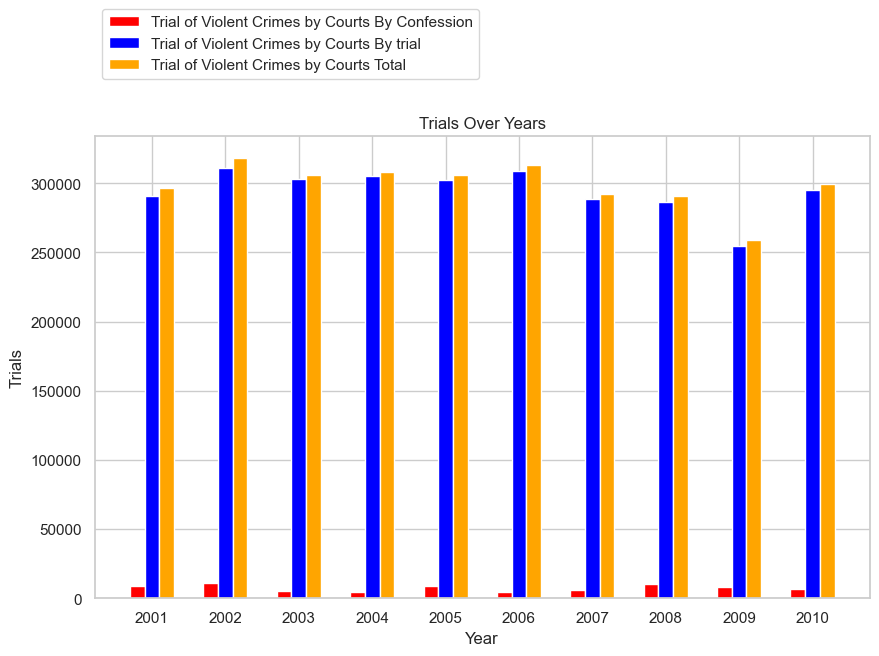

In [38]:
plt.figure(figsize=(10, 6))
bar_width = 0.2 
colors = ['red', 'blue', 'orange']
for i, column in enumerate(['Trial of Violent Crimes by Courts By Confession', 'Trial of Violent Crimes by Courts By trial', 'Trial of Violent Crimes by Courts Total']):
    plt.bar(merged_result['Year'] + i * bar_width, merged_result[column], width=bar_width, label=column,color = colors[i])

plt.xlabel('Year')
plt.ylabel('Trials')
plt.title('Trials Over Years')
plt.xticks(merged_result['Year'] + bar_width, merged_result['Year'])  
plt.legend(loc='center left', bbox_to_anchor=(0, 1.2))
plt.show()

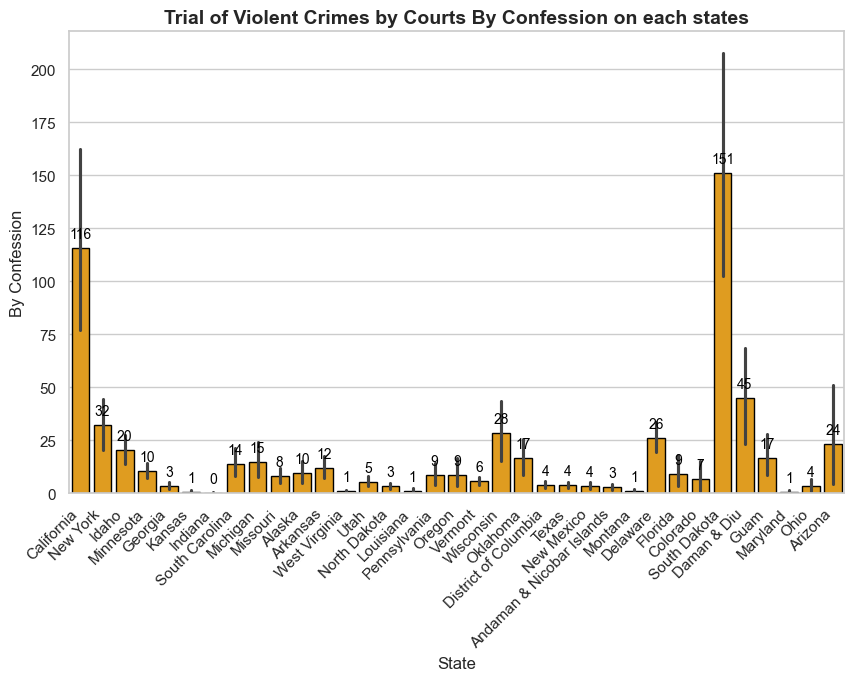

In [41]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='State', y='Trial of Violent Crimes by Courts By Confession', data=data,edgecolor='black',color="orange")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.xlabel('State', fontsize=12)
plt.ylabel('By Confession', fontsize=12)
plt.title('Trial of Violent Crimes by Courts By Confession on each states', fontweight="bold", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()